# Тестирование алгоритмов

### Импортируются необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
# Для отрисовки
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

### Чтение и обработка данных

In [64]:
data = pd.read_csv(
    'data/2014_2020.csv',
    sep=';',
    header=0,
    parse_dates=['M_DATE', 'INTERVAL'],
    dayfirst=True
)
data.head(40)

,INTERVAL,M_DATE,PRICE_ZONE_ID,POWER_SYS_ID,E_USE_FACT,E_USE_PLAN,GEN_FACT,GEN_PLAN
0,0,2014-01-01,1,0,85970.0,85855,87464.0,87442
1,1,2014-01-01,1,0,84015.0,83768,85430.0,85522
2,2,2014-01-01,1,0,81622.0,82124,83416.0,83894
3,3,2014-01-01,1,0,80001.0,80844,81320.0,82473
4,4,2014-01-01,1,0,79112.0,80010,80743.0,81474
5,5,2014-01-01,1,0,79127.0,80009,80712.0,81761
6,6,2014-01-01,1,0,79405.0,79859,80914.0,81507
7,7,2014-01-01,1,0,79654.0,80303,80730.0,81847
8,8,2014-01-01,1,0,80419.0,80687,81598.0,82139
9,9,2014-01-01,1,0,80754.0,81394,81680.0,82803


In [9]:
# Удаляются строки без данных
data_filtered = data[data.GEN_FACT > 0]

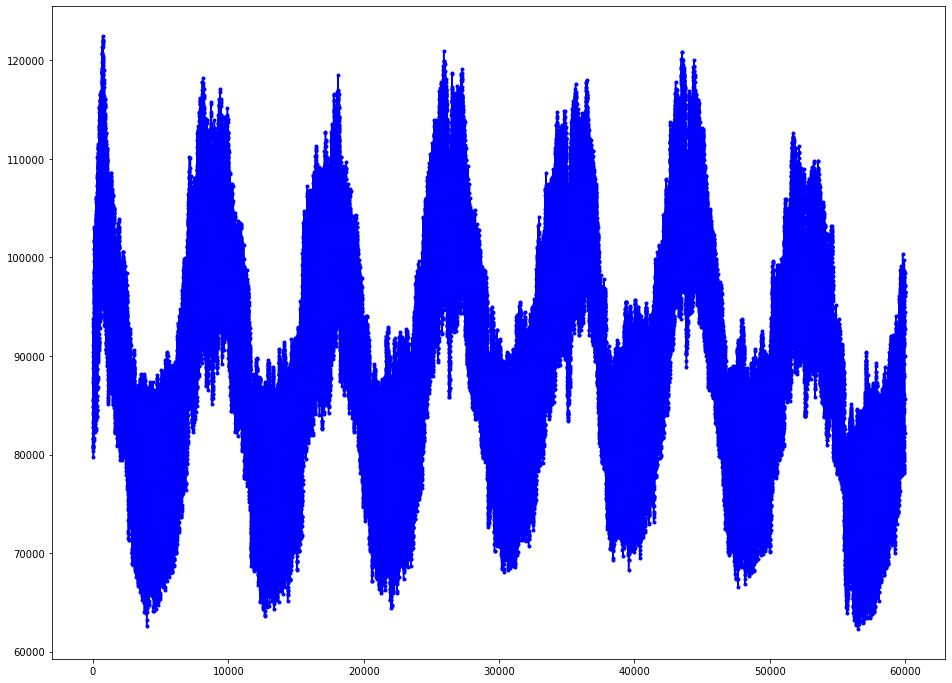

In [10]:
# Вырезается кусок отфильтрованных данных
piece = data_filtered[data_filtered.index < 24 * 7 * 51 * 7]
piece.head(30)
plt.plot(piece.GEN_FACT, 'b.-')

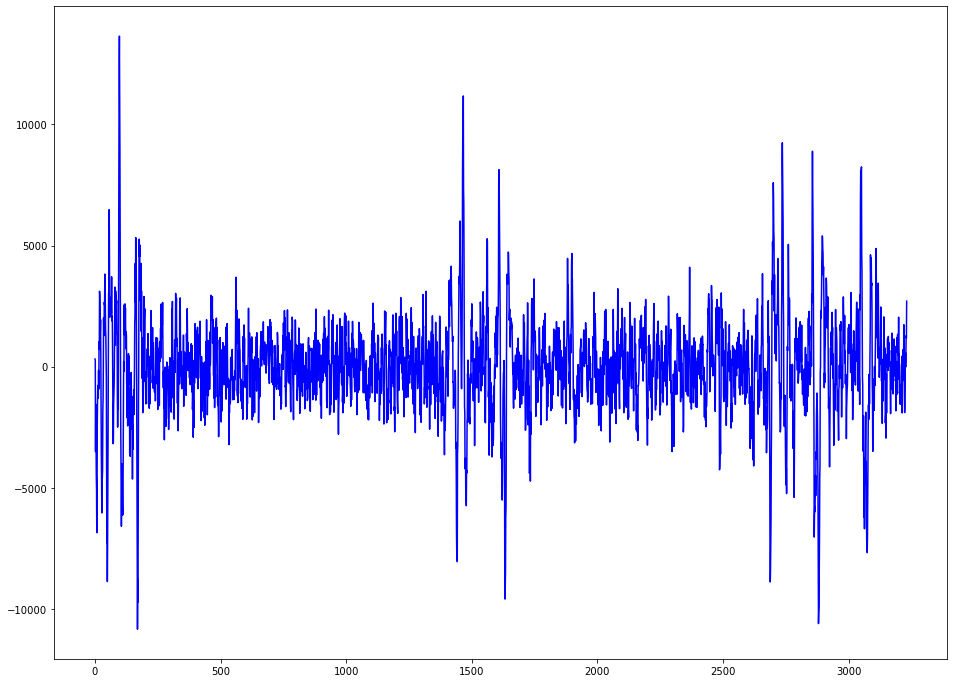

In [63]:
# Смотрим только 1 ряд - фактическую выработку
gen_fact = piece.GEN_FACT.values
# Убрана дневная сезонность
d_gen_fact = gen_fact[24:] - gen_fact[:-24]
# Убрана недельная сезонность
dd_gen_fact = d_gen_fact[7:] - d_gen_fact[:-7]
# 
dd_gen_fact = dd_gen_fact[:3400]
plt.plot(dd_gen_fact[168:] - dd_gen_fact[:-168], 'b-')

In [46]:
gb = data.groupby(['M_DATE', 'PRICE_ZONE_ID', 'POWER_SYS_ID'])